In [122]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
from sklearn.cluster import KMeans

df= pd.read_csv("spending_score.csv")
df.info()
df.columns
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   first_name      10000 non-null  object
 1   last_name       10000 non-null  object
 2   age             10000 non-null  int64 
 3   spending_score  10000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 312.6+ KB


(10000, 4)

In [123]:
df= df.drop(['first_name','last_name'], axis=1)

In [124]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
# code the scaling keeo the numbers in range

In [125]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10) # number of clusters, state nad init
kmeans.fit(X_scaled)
labels = kmeans.labels_
print(labels) #labels for the clusters
centroids = kmeans.cluster_centers_ # get the centroids center value by mean
print(centroids)
centroids_original = scaler.inverse_transform(centroids)
df['cluster']=labels # add the cluster labels to the dataframe
print(centroids_original)

[1 2 3 ... 2 0 0]
[[ 0.85601995 -0.85421476]
 [ 0.86857854  0.89898197]
 [-0.86305299 -0.87915406]
 [-0.89069326  0.84352945]]
[[56.52623274 25.5147929 ]
 [56.71519745 75.82608696]
 [30.65994353 24.79911255]
 [30.24405002 74.23477209]]


In [126]:
cluster_names = {}
# assign names to clusters based on centroids
for i, c in enumerate(centroids_original):
    age, spending_score= c

    if age < 31 and spending_score< 50:
        cluster_names[i] = "Young Low Income"
    elif age < 31 and spending_score>= 50:
        cluster_names[i] = "Young High Income"
    elif age >= 31 and spending_score< 50:
        cluster_names[i] = "Old Low Income"
    else:
        cluster_names[i] = "Old High Income"

In [127]:
df['cluster_name'] = df['cluster'].map(cluster_names) # give cluster names for each row
print(df)

      age  spending_score  cluster       cluster_name
0      58              59        1    Old High Income
1      26              43        2   Young Low Income
2      25              92        3  Young High Income
3      61              66        1    Old High Income
4      57               9        0     Old Low Income
...   ...             ...      ...                ...
9995   53              52        1    Old High Income
9996   64              65        1    Old High Income
9997   24              44        2   Young Low Income
9998   69              30        0     Old Low Income
9999   57              23        0     Old Low Income

[10000 rows x 4 columns]


In [128]:
print(df['cluster'].value_counts())

cluster
0    2535
1    2507
3    2482
2    2476
Name: count, dtype: int64


In [129]:
cluster_mapping = {
    0: "Old Low Income",
    1: "Old High Income",
    2: "Young Low Income",
    3: "Young High Income"
}
new_customer = [[15,10]]
new_customer_slaced = scaler.transform(new_customer)
print(kmeans.predict(new_customer_slaced))




[2]


c:\Users\Administrator\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [130]:
#elbow method to find optimal number of clusters - the number is where the WCSS / line starts to diminish
wcss = [] # within cluster sum of squares

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
print(wcss)


[20000.00000000003, 12435.257218086615, 7829.787814808731, 4882.3533236852945, 4157.980115745256, 3596.6068722050195, 3029.330366131415, 2515.993815778876, 2376.142446650428, 2030.4479430868594]


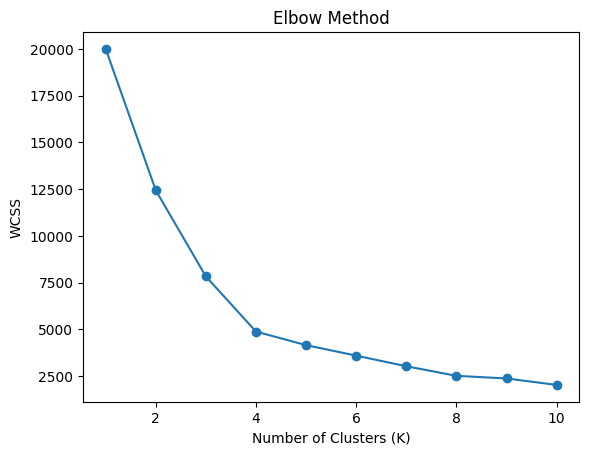

In [131]:

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [132]:

df['cluster_name'] = df['cluster'].map(cluster_names)
print(df)


      age  spending_score  cluster       cluster_name
0      58              59        1    Old High Income
1      26              43        2   Young Low Income
2      25              92        3  Young High Income
3      61              66        1    Old High Income
4      57               9        0     Old Low Income
...   ...             ...      ...                ...
9995   53              52        1    Old High Income
9996   64              65        1    Old High Income
9997   24              44        2   Young Low Income
9998   69              30        0     Old Low Income
9999   57              23        0     Old Low Income

[10000 rows x 4 columns]


In [133]:

print(df['cluster'].value_counts())


cluster
0    2535
1    2507
3    2482
2    2476
Name: count, dtype: int64


In [134]:
#prediction


new_customer = [[56, 16]] 

new_customer_scaled = scaler.transform(new_customer)

predicted_cluster = kmeans.predict(new_customer_scaled)

print("Predicted cluster:", predicted_cluster)

Predicted cluster: [4]


c:\Users\Administrator\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
